In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from datetime import datetime
from sqlalchemy import create_engine
#database connection parameters

#loading data
#agri data
filepath = r"C:\Users\LOQ\Downloads\ICRISAT-District Level Data - ICRISAT-District Level Data.csv"
df = pd.read_csv(filepath)



In [2]:
df

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [13]:
# Check for null values
df.isnull().sum()

Dist Code                 0
Year                      0
State Code                0
State                     0
District                  0
                         ..
Vegetables_Area           0
Fruits_Vegetables_Area    0
Potatoes_Area             0
Onion_Area                0
Fodder_Area               0
Length: 80, dtype: int64

In [14]:
#data cleaning
print(df.columns  )

Index(['Dist Code', 'Year', 'State Code', 'State', 'District', 'Rice_Area',
       'Rice_Production', 'Rice_Yield', 'Wheat_Area', 'Wheat_Production',
       'Wheat_Yield', 'Kharif_Sorghum_Area', 'Kharif_Sorghum_Production',
       'Kharif_Sorghum_Yield', 'Rabi_Sorghum_Area', 'Rabi_Sorghum_Production',
       'Rabi_Sorghum_Yield', 'Sorghum_Area', 'Sorghum_Production',
       'Sorghum_Yield', 'Pearl_Millet_Area', 'Pearl_Millet_Production',
       'Pearl_Millet_Yield', 'Maize_Area', 'Maize_Production', 'Maize_Yield',
       'Finger_Millet_Area', 'Finger_Millet_Production', 'Finger_Millet_Yield',
       'Barley_Area', 'Barley_Production', 'Barley_Yield', 'Chickpea_Area',
       'Chickpea_Production', 'Chickpea_Yield', 'Pigeonpea_Area',
       'Pigeonpea_Production', 'Pigeonpea_Yield', 'Minor_Pulses_Area',
       'Minor_Pulses_Production', 'Minor_Pulses_Yield', 'Groundnut_Area',
       'Groundnut_Production', 'Groundnut_Yield', 'Sesamum_Area',
       'Sesamum_Production', 'Sesamum_Yield', '

In [55]:
# Before dropping columns, print the DataFrame columns to debug
print("Available columns:", df.columns.tolist())

# Fix: Only drop columns that actually exist in the DataFrame
required_columns = [
    'Dist Name', 'State Name', 'Year',
    'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
    'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
    'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
    'KHARIF SORGHUM AREA (1000 ha)',
    'KHARIF SORGHUM PRODUCTION (1000 tons)',
    'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
    'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
    'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
    'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
    'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
    'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
    'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
    'FINGER MILLET PRODUCTION (1000 tons)',
    'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
    'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)',
    'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)',
    'CHICKPEA YIELD (Kg per ha)', 'PIGEONPEA AREA (1000 ha)',
    'PIGEONPEA PRODUCTION (1000 tons)', 'PIGEONPEA YIELD (Kg per ha)',
    'MINOR PULSES AREA (1000 ha)', 'MINOR PULSES PRODUCTION (1000 tons)',
    'MINOR PULSES YIELD (Kg per ha)', 'GROUNDNUT AREA (1000 ha)',
    'GROUNDNUT PRODUCTION (1000 tons)', 'GROUNDNUT YIELD (Kg per ha)',
    'SESAMUM AREA (1000 ha)', 'SESAMUM PRODUCTION (1000 tons)',
    'SESAMUM YIELD (Kg per ha)', 'RAPESEED AND MUSTARD AREA (1000 ha)',
    'RAPESEED AND MUSTARD PRODUCTION (1000 tons)',
    'RAPESEED AND MUSTARD YIELD (Kg per ha)', 'SAFFLOWER AREA (1000 ha)',
    'SAFFLOWER PRODUCTION (1000 tons)', 'SAFFLOWER YIELD (Kg per ha)',
    'CASTOR AREA (1000 ha)', 'CASTOR PRODUCTION (1000 tons)',
    'CASTOR YIELD (Kg per ha)', 'LINSEED AREA (1000 ha)',
    'LINSEED PRODUCTION (1000 tons)', 'LINSEED YIELD (Kg per ha)',
    'SUNFLOWER AREA (1000 ha)', 'SUNFLOWER PRODUCTION (1000 tons)',
    'SUNFLOWER YIELD (Kg per ha)', 'SOYABEAN AREA (1000 ha)',
    'SOYABEAN PRODUCTION (1000 tons)', 'SOYABEAN YIELD (Kg per ha)',
    'OILSEEDS AREA (1000 ha)', 'OILSEEDS PRODUCTION (1000 tons)',
    'OILSEEDS YIELD (Kg per ha)', 'SUGARCANE AREA (1000 ha)',
    'SUGARCANE PRODUCTION (1000 tons)', 'SUGARCANE YIELD (Kg per ha)',
    'COTTON AREA (1000 ha)', 'COTTON PRODUCTION (1000 tons)',
    'COTTON YIELD (Kg per ha)', 'FRUITS AREA (1000 ha)',
    'VEGETABLES AREA (1000 ha)', 'FRUITS AND VEGETABLES AREA (1000 ha)',
    'POTATOES AREA (1000 ha)', 'ONION AREA (1000 ha)',
    'FODDER AREA (1000 ha)'
]

# Only keep columns that exist in the DataFrame
existing_required_columns = [col for col in required_columns if col in df.columns]

if existing_required_columns:
    df = df.dropna(subset=existing_required_columns)
else:
    print("Warning: None of the required columns exist in the DataFrame. No rows dropped.")


Available columns: ['Dist Code', 'Year', 'State Code', 'State', 'District', 'Rice_Area', 'Rice_Production', 'Rice_Yield', 'Wheat_Area', 'Wheat_Production', 'Wheat_Yield', 'Kharif_Sorghum_Area', 'Kharif_Sorghum_Production', 'Kharif_Sorghum_Yield', 'Rabi_Sorghum_Area', 'Rabi_Sorghum_Production', 'Rabi_Sorghum_Yield', 'Sorghum_Area', 'Sorghum_Production', 'Sorghum_Yield', 'Pearl_Millet_Area', 'Pearl_Millet_Production', 'Pearl_Millet_Yield', 'Maize_Area', 'Maize_Production', 'Maize_Yield', 'Finger_Millet_Area', 'Finger_Millet_Production', 'Finger_Millet_Yield', 'Barley_Area', 'Barley_Production', 'Barley_Yield', 'Chickpea_Area', 'Chickpea_Production', 'Chickpea_Yield', 'Pigeonpea_Area', 'Pigeonpea_Production', 'Pigeonpea_Yield', 'Minor_Pulses_Area', 'Minor_Pulses_Production', 'Minor_Pulses_Yield', 'Groundnut_Area', 'Groundnut_Production', 'Groundnut_Yield', 'Sesamum_Area', 'Sesamum_Production', 'Sesamum_Yield', 'Rapeseed_Mustard_Area', 'Rapeseed_Mustard_Production', 'Rapeseed_Mustard_Yield

In [17]:
df.columns.tolist()

['Dist Code',
 'Year',
 'State Code',
 'State',
 'District',
 'Rice_Area',
 'Rice_Production',
 'Rice_Yield',
 'Wheat_Area',
 'Wheat_Production',
 'Wheat_Yield',
 'Kharif_Sorghum_Area',
 'Kharif_Sorghum_Production',
 'Kharif_Sorghum_Yield',
 'Rabi_Sorghum_Area',
 'Rabi_Sorghum_Production',
 'Rabi_Sorghum_Yield',
 'Sorghum_Area',
 'Sorghum_Production',
 'Sorghum_Yield',
 'Pearl_Millet_Area',
 'Pearl_Millet_Production',
 'Pearl_Millet_Yield',
 'Maize_Area',
 'Maize_Production',
 'Maize_Yield',
 'Finger_Millet_Area',
 'Finger_Millet_Production',
 'Finger_Millet_Yield',
 'Barley_Area',
 'Barley_Production',
 'Barley_Yield',
 'Chickpea_Area',
 'Chickpea_Production',
 'Chickpea_Yield',
 'Pigeonpea_Area',
 'Pigeonpea_Production',
 'Pigeonpea_Yield',
 'Minor_Pulses_Area',
 'Minor_Pulses_Production',
 'Minor_Pulses_Yield',
 'Groundnut_Area',
 'Groundnut_Production',
 'Groundnut_Yield',
 'Sesamum_Area',
 'Sesamum_Production',
 'Sesamum_Yield',
 'Rapeseed_Mustard_Area',
 'Rapeseed_Mustard_Product

In [56]:
#rename columns
df.rename(columns={
    'Dist Code': 'District_Code',
    'State Code': 'State_Code',
}, inplace=True)
    


In [57]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])




# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

Missing values in each column:
Series([], dtype: int64)

Number of duplicate rows: 0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   District_Code                16146 non-null  int64  
 1   Year                         16146 non-null  int64  
 2   State_Code                   16146 non-null  int64  
 3   State                        16146 non-null  object 
 4   District                     16146 non-null  object 
 5   Rice_Area                    16146 non-null  float64
 6   Rice_Production              16146 non-null  float64
 7   Rice_Yield                   16146 non-null  float64
 8   Wheat_Area                   16146 non-null  float64
 9   Wheat_Production             16146 non-null  float64
 10  Wheat_Yield                  16146 non-null  float64
 11  Kharif_Sorghum_Area          16146 non-null  float64
 12  Kharif_Sorghum_Production    16146 non-null  float64
 13  Kharif_Sorghum_Y

In [60]:
#data cleaning 
#Clean the data by addressing missing values, standardizing units, and ensuring consistency across various fields (e.g., converting hectares, tons, and kilograms).
# Convert area from '1000 ha' to hectares
df['Rice_Area'] = df['Rice_Area'] * 1000
df['Wheat_Area'] = df['Wheat_Area'] * 1000
df['Kharif_Sorghum_Area'] = df['Kharif_Sorghum_Area'] * 1000
df['Rabi_Sorghum_Area'] = df['Rabi_Sorghum_Area'] * 1000
df['Sorghum_Area'] = df['Sorghum_Area'] * 1000
df['Pearl_Millet_Area'] = df['Pearl_Millet_Area'] * 1000
df['Maize_Area'] = df['Maize_Area'] * 1000
df['Finger_Millet_Area'] = df['Finger_Millet_Area'] * 1000
df['Barley_Area'] = df['Barley_Area'] * 1000
df['Chickpea_Area'] = df['Chickpea_Area'] * 1000
df['Pigeonpea_Area'] = df['Pigeonpea_Area'] * 1000
df['Minor_Pulses_Area'] = df['Minor_Pulses_Area'] * 1000
df['Groundnut_Area'] = df['Groundnut_Area'] * 1000
df['Sesamum_Area'] = df['Sesamum_Area'] * 1000
df['Rapeseed_Mustard_Area'] = df['Rapeseed_Mustard_Area'] * 1000
df['Safflower_Area'] = df['Safflower_Area'] * 1000
df['Castor_Area'] = df['Castor_Area'] * 1000
df['Linseed_Area'] = df['Linseed_Area'] * 1000
df['Sunflower_Area'] = df['Sunflower_Area'] * 1000
df['Soyabean_Area'] = df['Soyabean_Area'] * 1000
df['Oilseeds_Area'] = df['Oilseeds_Area'] * 1000
df['Sugarcane_Area'] = df['Sugarcane_Area'] * 1000
df['Cotton_Area'] = df['Cotton_Area'] * 1000
df['Fruits_Area'] = df['Fruits_Area'] * 1000
df['Vegetables_Area'] = df['Vegetables_Area'] * 1000
df['Fruits_Vegetables_Area'] = df['Fruits_Vegetables_Area'] * 1000
df['Potatoes_Area'] = df['Potatoes_Area'] * 1000
df['Onion_Area'] = df['Onion_Area'] * 1000
df['Fodder_Area'] = df['Fodder_Area'] * 1000
# Convert production from '1000 tons' to tons
df['Rice_Production'] = df['Rice_Production'] * 1000
df['Wheat_Production'] = df['Wheat_Production'] * 1000
df['Kharif_Sorghum_Production'] = df['Kharif_Sorghum_Production'] * 1000
df['Rabi_Sorghum_Production'] = df['Rabi_Sorghum_Production'] * 1000
df['Sorghum_Production'] = df['Sorghum_Production'] * 1000
df['Pearl_Millet_Production'] = df['Pearl_Millet_Production'] * 1000
df['Maize_Production'] = df['Maize_Production'] * 1000
df['Finger_Millet_Production'] = df['Finger_Millet_Production'] * 1000
df['Barley_Production'] = df['Barley_Production'] * 1000
df['Chickpea_Production'] = df['Chickpea_Production'] * 1000
df['Pigeonpea_Production'] = df['Pigeonpea_Production'] * 1000
df['Minor_Pulses_Production'] = df['Minor_Pulses_Production'] * 1000
df['Groundnut_Production'] = df['Groundnut_Production'] * 1000
df['Sesamum_Production'] = df['Sesamum_Production'] * 1000
df['Rapeseed_Mustard_Production'] = df['Rapeseed_Mustard_Production'] * 1000
df['Safflower_Production'] = df['Safflower_Production'] * 1000
df['Castor_Production'] = df['Castor_Production'] * 1000
df['Linseed_Production'] = df['Linseed_Production'] * 1000
df['Sunflower_Production'] = df['Sunflower_Production'] * 1000
df['Soyabean_Production'] = df['Soyabean_Production'] * 1000
df['Oilseeds_Production'] = df['Oilseeds_Production'] * 1000
df['Sugarcane_Production'] = df['Sugarcane_Production'] * 1000
df['Cotton_Production'] = df['Cotton_Production'] * 1000
# Convert yield from 'Kg per ha' to tons per hectare
df['Rice_Yield'] = df['Rice_Yield'] / 1000  # Convert Kg to tons
df['Wheat_Yield'] = df['Wheat_Yield'] / 1000
df['Kharif_Sorghum_Yield'] = df['Kharif_Sorghum_Yield'] / 1000
df['Rabi_Sorghum_Yield'] = df['Rabi_Sorghum_Yield'] / 1000
df['Sorghum_Yield'] = df['Sorghum_Yield'] / 1000
df['Pearl_Millet_Yield'] = df['Pearl_Millet_Yield'] / 1000
df['Maize_Yield'] = df['Maize_Yield'] / 1000
df['Finger_Millet_Yield'] = df['Finger_Millet_Yield'] / 1000
df['Barley_Yield'] = df['Barley_Yield'] / 1000
df['Chickpea_Yield'] = df['Chickpea_Yield'] / 1000
df['Pigeonpea_Yield'] = df['Pigeonpea_Yield'] / 1000
df['Minor_Pulses_Yield'] = df['Minor_Pulses_Yield'] / 1000
df['Groundnut_Yield'] = df['Groundnut_Yield'] / 1000
df['Sesamum_Yield'] = df['Sesamum_Yield'] / 1000    
df['Rapeseed_Mustard_Yield'] = df['Rapeseed_Mustard_Yield'] / 1000
df['Safflower_Yield'] = df['Safflower_Yield'] / 1000
df['Castor_Yield'] = df['Castor_Yield'] / 1000
df['Linseed_Yield'] = df['Linseed_Yield'] / 1000
df['Sunflower_Yield'] = df['Sunflower_Yield'] / 1000
df['Soyabean_Yield'] = df['Soyabean_Yield'] / 1000
df['Oilseeds_Yield'] = df['Oilseeds_Yield'] / 1000
df['Sugarcane_Yield'] = df['Sugarcane_Yield'] / 1000
# Display the cleaned DataFrame
print(df.head())
# Save the cleaned DataFrame to a new CSV file
output_filepath = r"C:\Users\LOQ\Downloads\ICRISAT_District_Level_Data_Cleaned3.csv"
df.to_csv(output_filepath, index=False) 
# Display the cleaned DataFrame
print("Cleaned data saved to:", output_filepath)
# Data Visualization
# Set the style for seaborn

   District_Code  Year  State_Code         State District     Rice_Area  \
0              1  1966          14  Chhattisgarh     Durg  5.480000e+17   
1              1  1967          14  Chhattisgarh     Durg  5.470000e+17   
2              1  1968          14  Chhattisgarh     Durg  5.563000e+17   
3              1  1969          14  Chhattisgarh     Durg  5.634000e+17   
4              1  1970          14  Chhattisgarh     Durg  5.716000e+17   

   Rice_Production    Rice_Yield    Wheat_Area  Wheat_Production  ...  \
0     1.850000e+17  3.375900e-13  4.400000e+16      2.000000e+16  ...   
1     4.090000e+17  7.477100e-13  5.000000e+16      2.600000e+16  ...   
2     4.680000e+17  8.412700e-13  5.370000e+16      3.000000e+16  ...   
3     4.008000e+17  7.114000e-13  4.940000e+16      2.650000e+16  ...   
4     4.736000e+17  8.285500e-13  4.420000e+16      2.900000e+16  ...   

   Sugarcane_Yield  Cotton_Area  Cotton_Production  Cotton_Yield  \
0     1.777780e-12          0.0           

In [61]:

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\3606511143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Rice_Production', data=top_rice_states, palette='viridis')


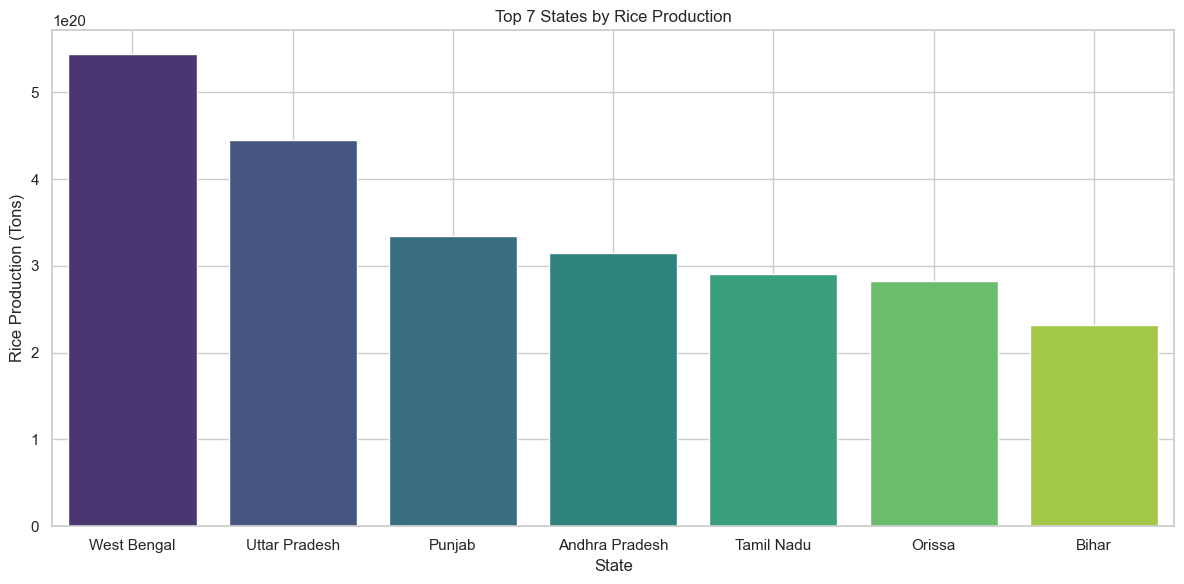

In [62]:
#EDA Visualization
sns.set(style="whitegrid")
# Create a bar plot for Rice Production by State
#Top 7 RICE PRODUCTION State Data(Bar_plot)
plt.figure(figsize=(12, 6))
top_rice_states = df.groupby('State')['Rice_Production'].sum().nlargest(7).reset_index()
sns.barplot(x='State', y='Rice_Production', data=top_rice_states, palette='viridis')
plt.xticks(rotation=360)
plt.grid(axis='x')
plt.title('Top 7 States by Rice Production')
plt.xlabel('State')
plt.ylabel('Rice Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_7_States_by_Rice_Production.png")
plt.show()




C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\3662650117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Wheat_Production', data=top_wheat_states, palette='viridis')


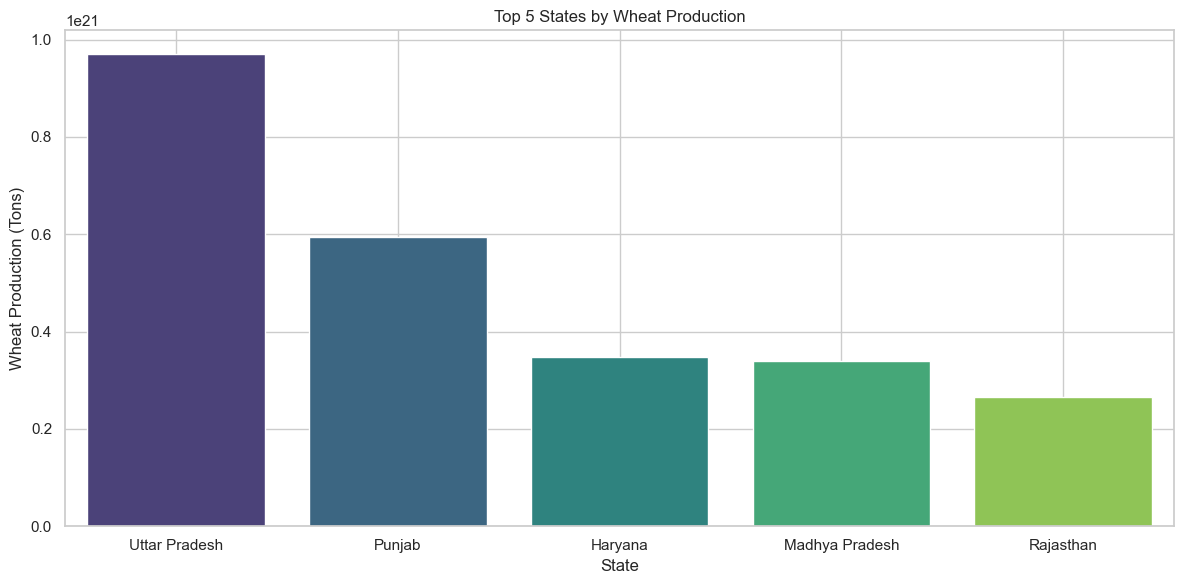

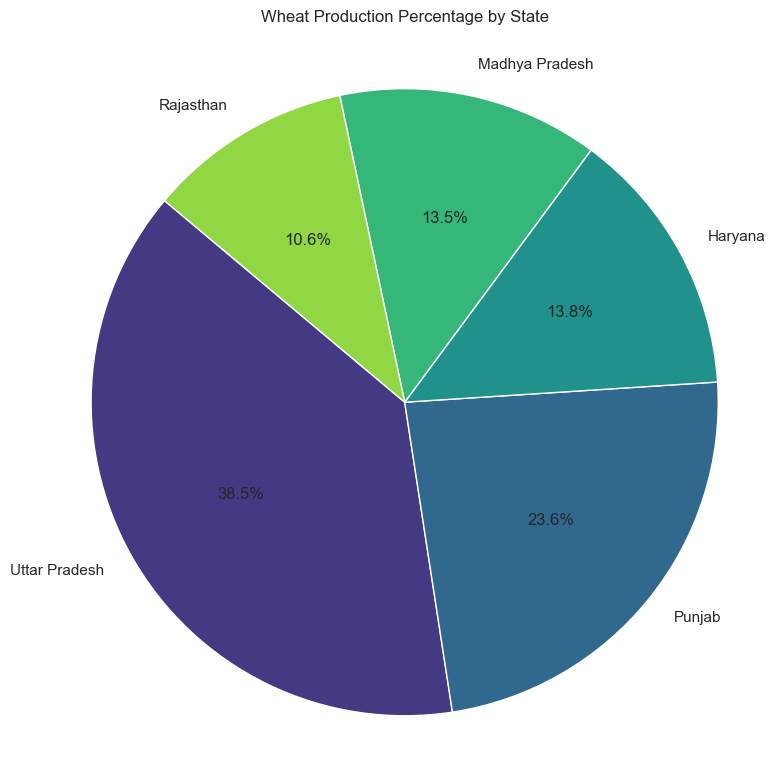

In [63]:
# Top 5 Wheat Producing States Data (Bar chart) and its percentage (%) (Pie chart)
plt.figure(figsize=(12, 6))
top_wheat_states = df.groupby('State')['Wheat_Production'].sum().nlargest(5).reset_index()
sns.barplot(x='State', y='Wheat_Production', data=top_wheat_states, palette='viridis')
# Set the x-ticks to show all state names clearly
plt.xticks(rotation=360)
plt.grid(axis='x')
plt.title('Top 5 States by Wheat Production')
plt.xlabel('State')
plt.ylabel('Wheat Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_5_States_by_Wheat_Production.png")
plt.show()

# Pie chart for Wheat Production percentage by State
plt.figure(figsize=(8, 8))
plt.pie(top_wheat_states['Wheat_Production'], labels=top_wheat_states['State'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=len(top_wheat_states)))
plt.title('Wheat Production Percentage by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Wheat_Production_Percentage_by_State.png")
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\3469067203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Oilseeds_Production', data=top_oilseed_states, palette='viridis')


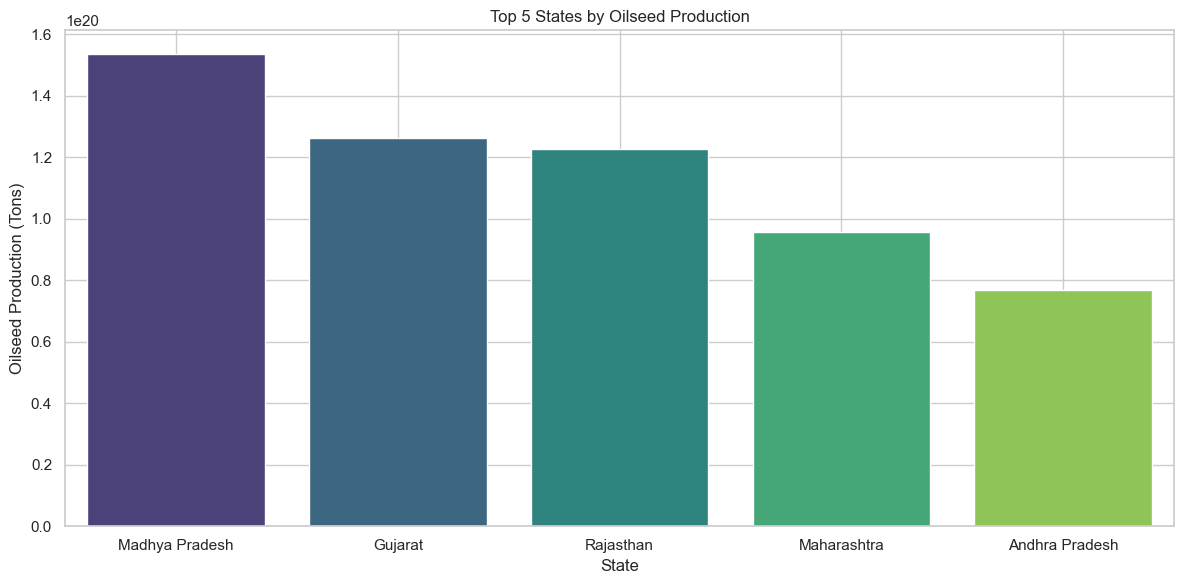

In [64]:
#Oil seed production by top 5 states
plt.figure(figsize=(12, 6))
top_oilseed_states = df.groupby('State')['Oilseeds_Production'].sum().nlargest(5).reset_index()
sns.barplot(x='State', y='Oilseeds_Production', data=top_oilseed_states, palette='viridis')
plt.xticks(rotation=360)
plt.grid(axis='x')
plt.title('Top 5 States by Oilseed Production')
plt.xlabel('State')
plt.ylabel('Oilseed Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_5_States_by_Oilseed_Production.png")
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\3529263205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Sunflower_Production', data=top_sunflower_states, palette='viridis')


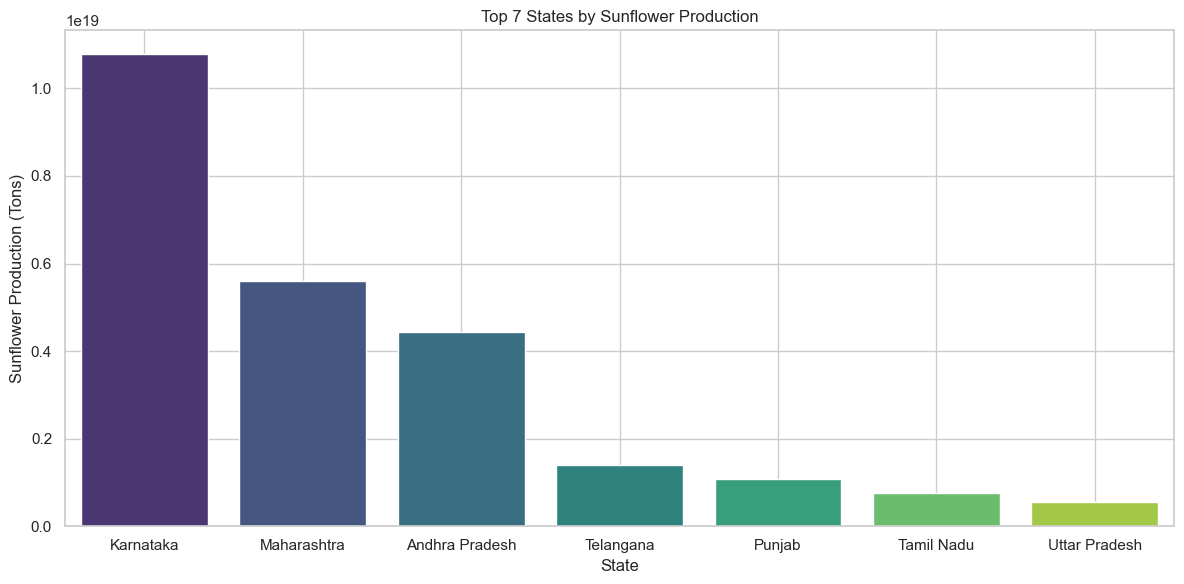

In [65]:
#Top 7 SUNFLOWER PRODUCTION  State

plt.figure(figsize=(12, 6))
top_sunflower_states = df.groupby('State')['Sunflower_Production'].sum().nlargest(7).reset_index()
sns.barplot(x='State', y='Sunflower_Production', data=top_sunflower_states, palette='viridis')
plt.xticks(rotation=360)        
plt.grid(axis='x')
plt.title('Top 7 States by Sunflower Production')   
plt.xlabel('State')
plt.ylabel('Sunflower Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_7_States_by_Sunflower_Production.png")
plt.show()  



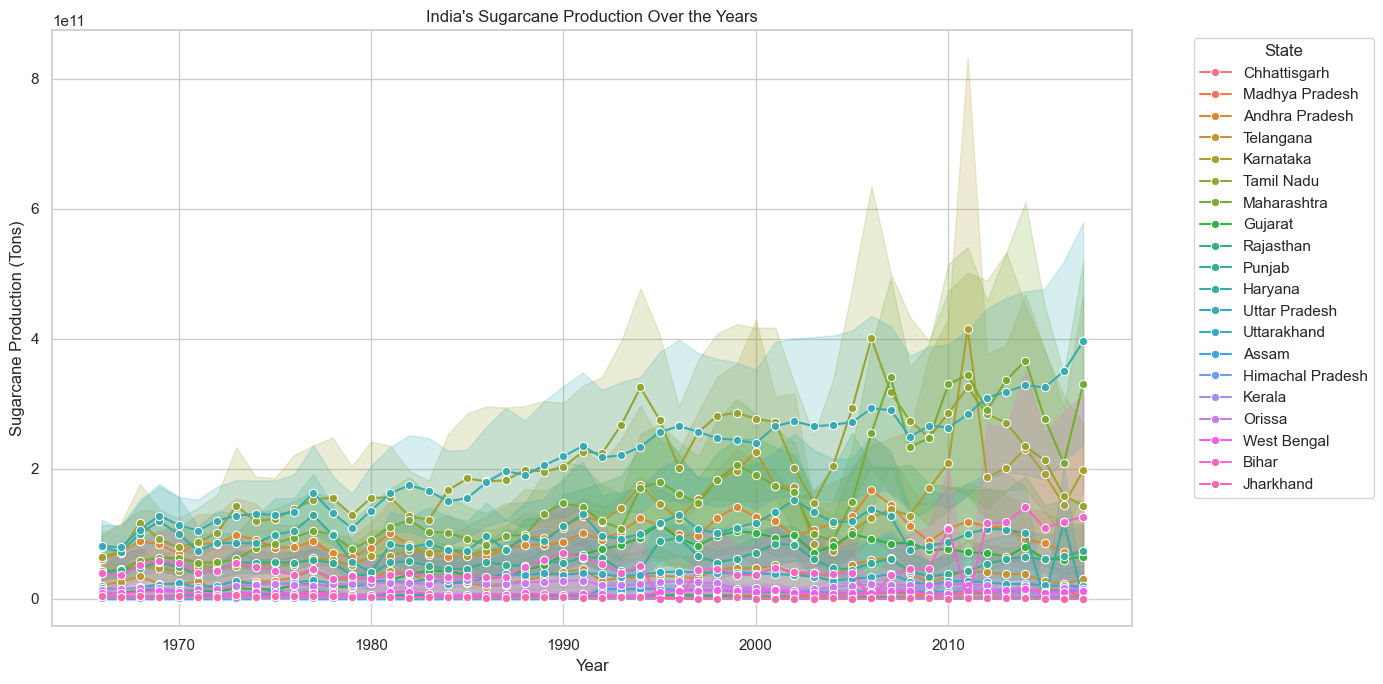

In [28]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Year', y='Sugarcane_Production', hue='State', marker='o')
plt.title('India\'s Sugarcane Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Sugarcane Production (Tons)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\India_Sugarcane_Production_Over_Years.png")
plt.show()


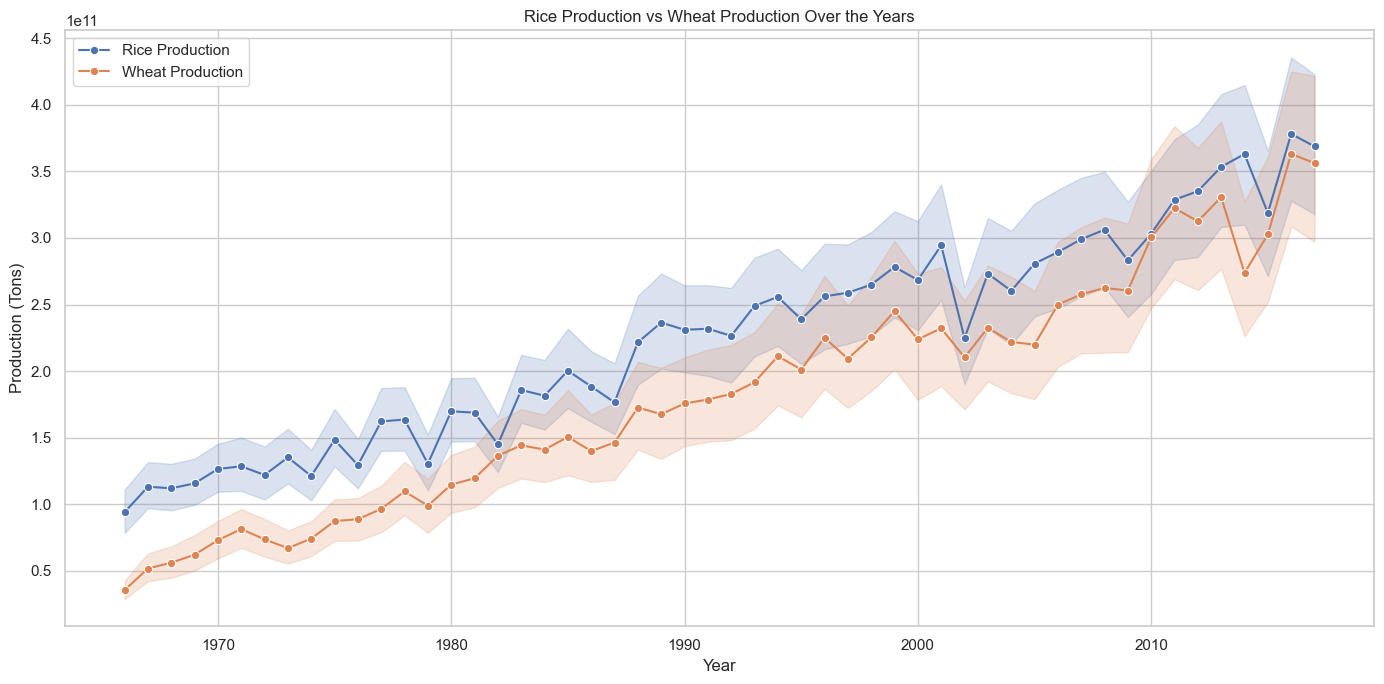

In [29]:
#Rice Production Vs Wheat Production (Last 50y)
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Year', y='Rice_Production', label='Rice Production', marker='o')
sns.lineplot(data=df, x='Year', y='Wheat_Production', label='Wheat Production', marker='o')
plt.title('Rice Production vs Wheat Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Rice_vs_Wheat_Production_Over_Years.png")
plt.show()  

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\803818849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District', y='Rice_Production', data=wb_rice_production, palette='viridis')


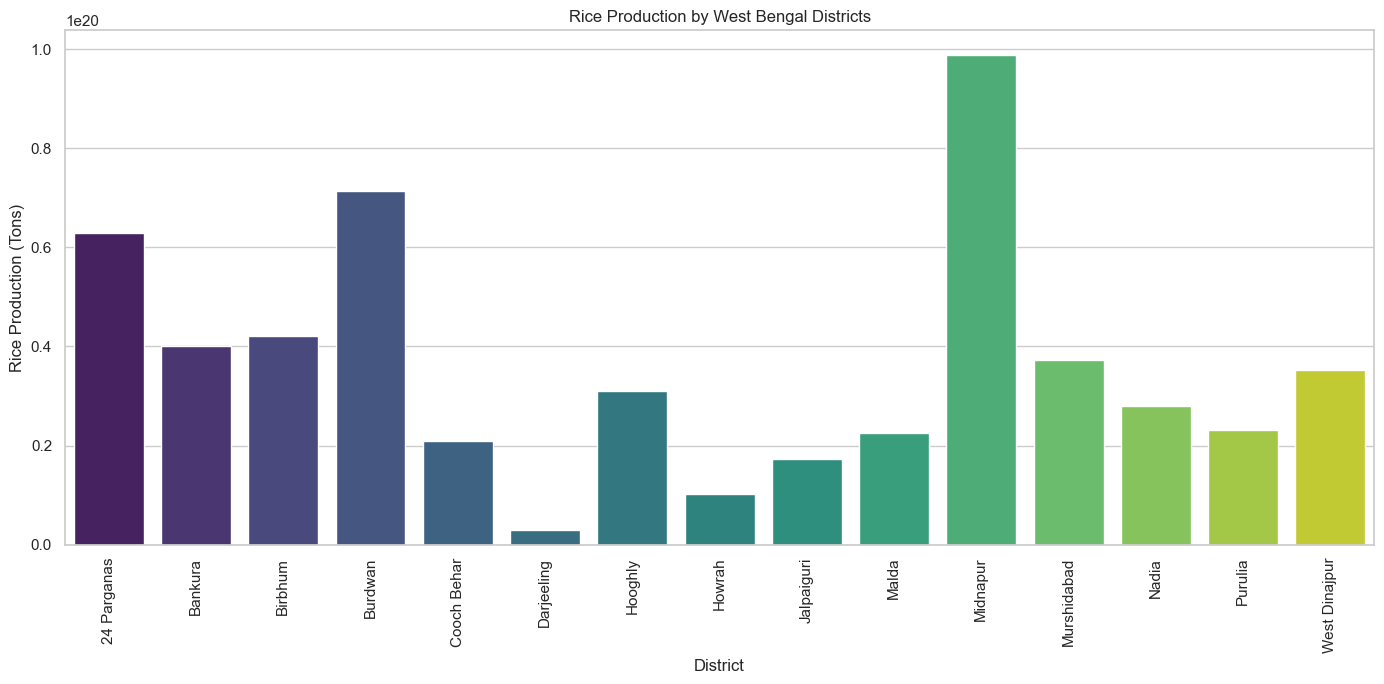

In [66]:
#Rice Production By West Bengal Districts
plt.figure(figsize=(14, 7))
wb_rice_production = df[df['State'] == 'West Bengal'].groupby('District')['Rice_Production'].sum().reset_index()
sns.barplot(x='District', y='Rice_Production', data=wb_rice_production, palette='viridis')
plt.xticks(rotation=90)
plt.title('Rice Production by West Bengal Districts')
plt.xlabel('District')
plt.ylabel('Rice Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Rice_Production_by_West_Bengal_Districts.png")
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\1248080376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Wheat_Production', data=top_up_wheat_years, palette='viridis')


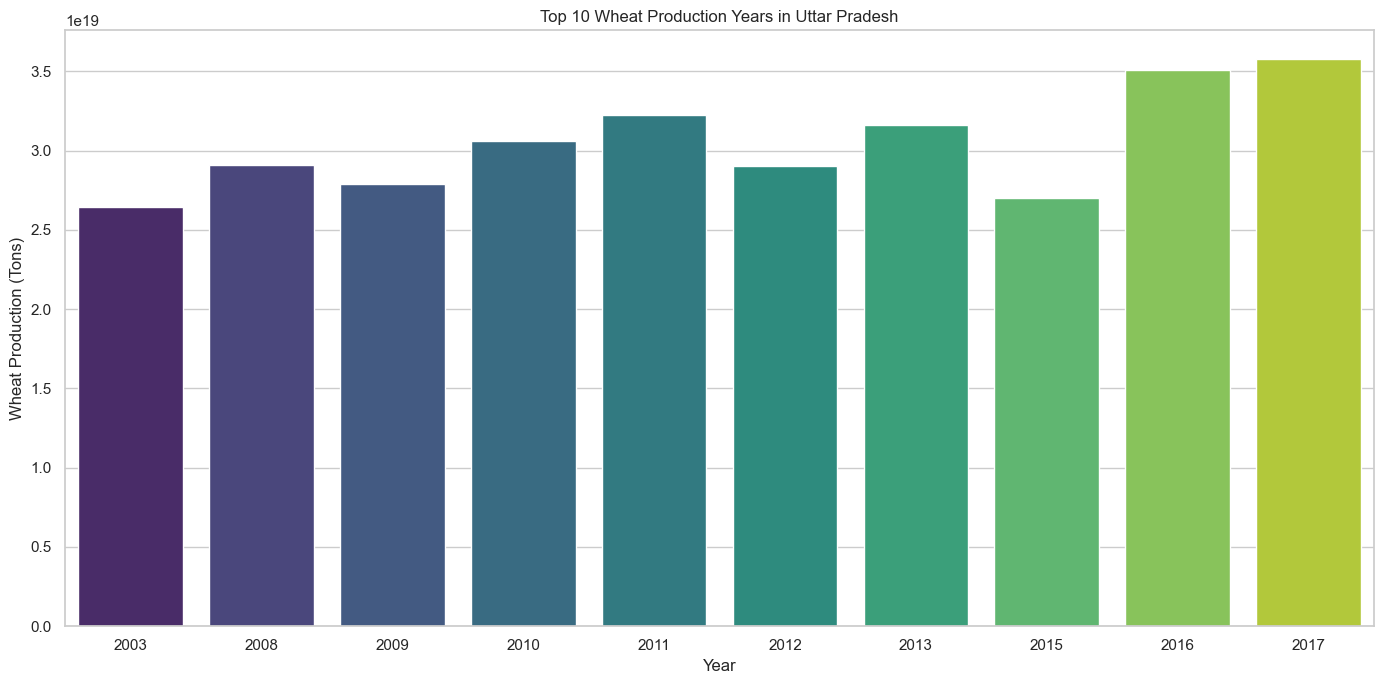

In [67]:
#Top 10 Wheat Production Years From UP

plt.figure(figsize=(14, 7))
up_wheat_production = df[df['State'] == 'Uttar Pradesh'].groupby('Year')['Wheat_Production'].sum().reset_index()
top_up_wheat_years = up_wheat_production.nlargest(10, 'Wheat_Production')
sns.barplot(x='Year', y='Wheat_Production', data=top_up_wheat_years, palette='viridis')
plt.title('Top 10 Wheat Production Years in Uttar Pradesh')
plt.xlabel('Year')
plt.ylabel('Wheat Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_10_Wheat_Production_Years_UP.png")
plt.show()

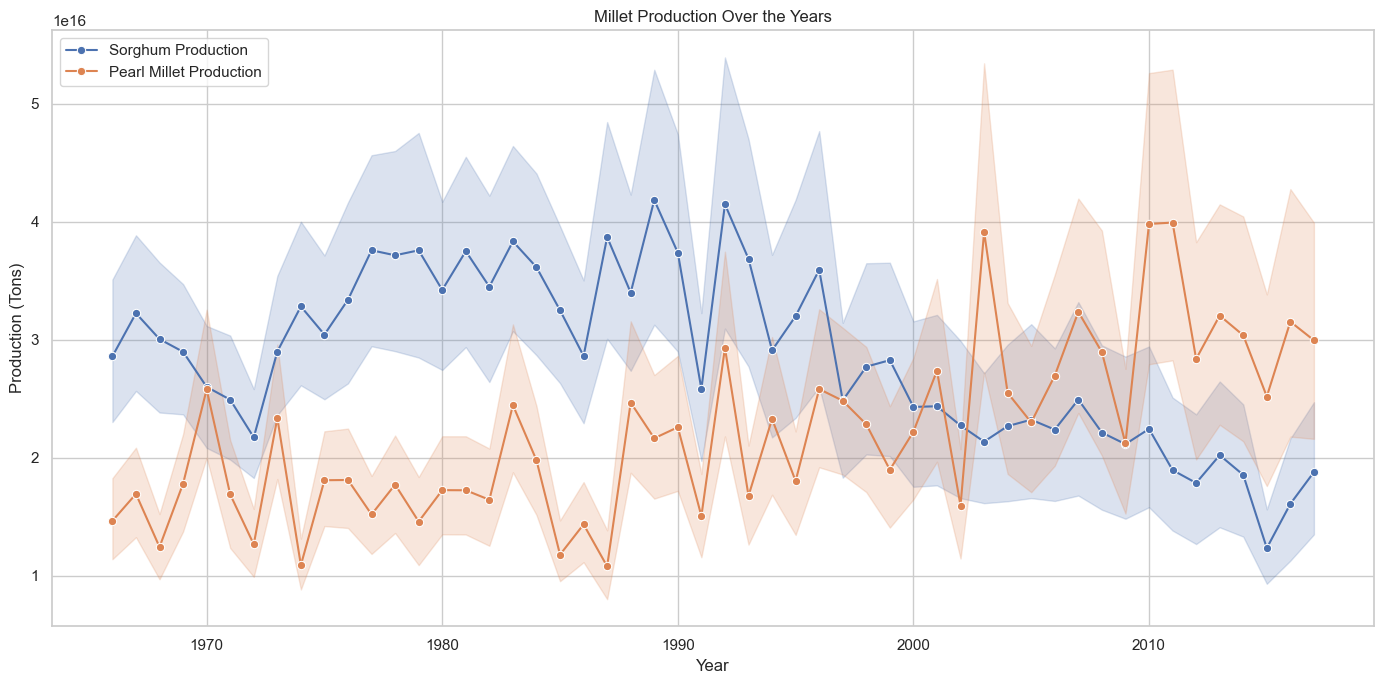

In [68]:
#Millet Production (Last 50y)
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Year', y='Sorghum_Production', label='Sorghum Production', marker='o')
sns.lineplot(data=df, x='Year', y='Pearl_Millet_Production', label='Pearl Millet Production', marker='o')
plt.title('Millet Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Millet_Production_Over_Years.png")
plt.show()  


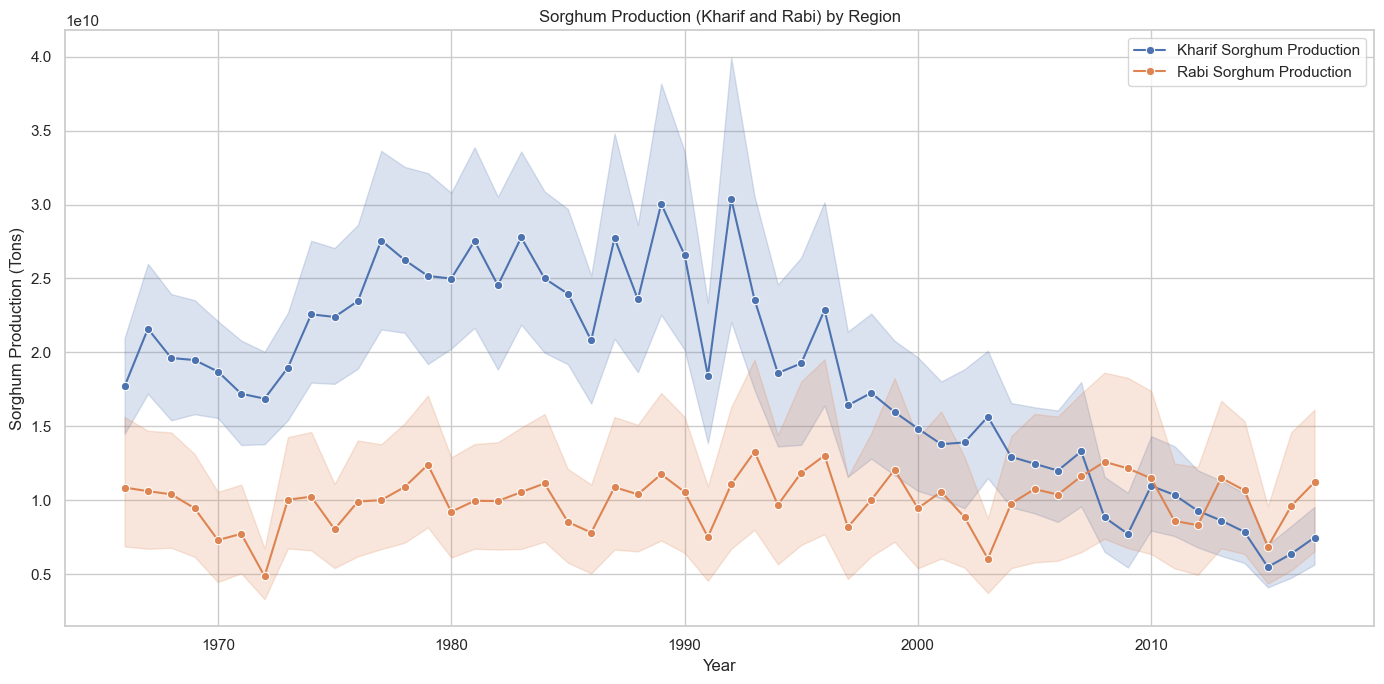

In [37]:
#Sorghum Production (Kharif and Rabi) by Region
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Year', y='Kharif_Sorghum_Production', label='Kharif Sorghum Production', marker='o')
sns.lineplot(data=df, x='Year', y='Rabi_Sorghum_Production', label='Rabi Sorghum Production', marker='o')
plt.title('Sorghum Production (Kharif and Rabi) by Region') 
plt.xlabel('Year')
plt.ylabel('Sorghum Production (Tons)')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Sorghum_Production_Kharif_Rabi_by_Region.png")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\3757727671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Groundnut_Production', data=top_groundnut_states, palette='viridis')


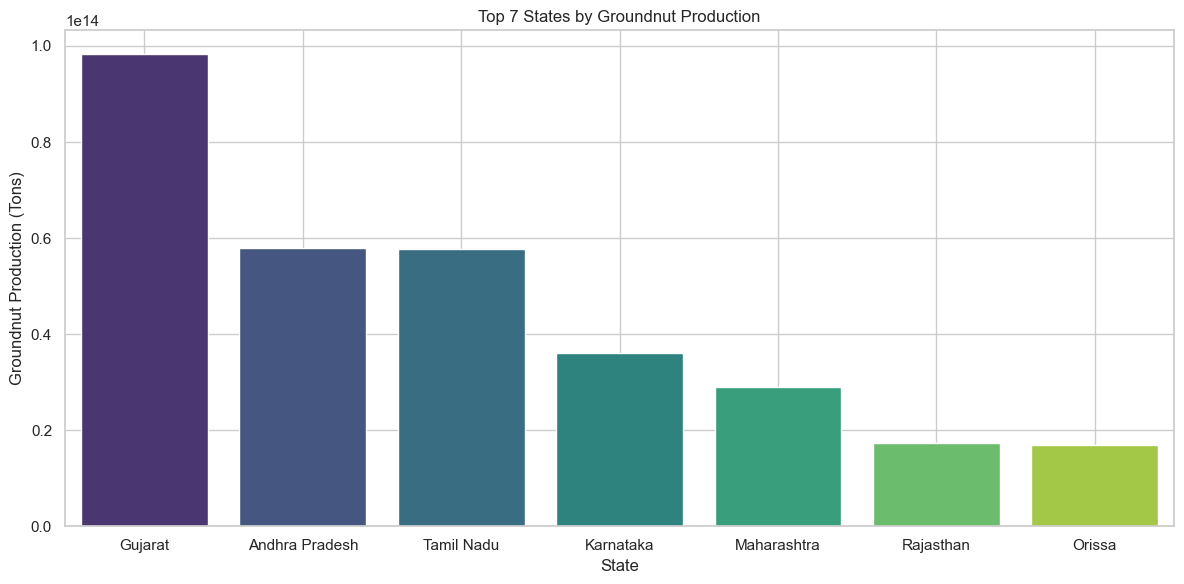

In [38]:
#Top 7 States for Groundnut Production
plt.figure(figsize=(12, 6))
top_groundnut_states = df.groupby('State')['Groundnut_Production'].sum().nlargest(7).reset_index()
sns.barplot(x='State', y='Groundnut_Production', data=top_groundnut_states, palette='viridis')
plt.xticks(rotation=360)
plt.grid(axis='x')
plt.title('Top 7 States by Groundnut Production')   
plt.xlabel('State')
plt.ylabel('Groundnut Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_7_States_by_Groundnut_Production.png")
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\1482961329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Soyabean_Production', data=top_soybean_states, palette='viridis')


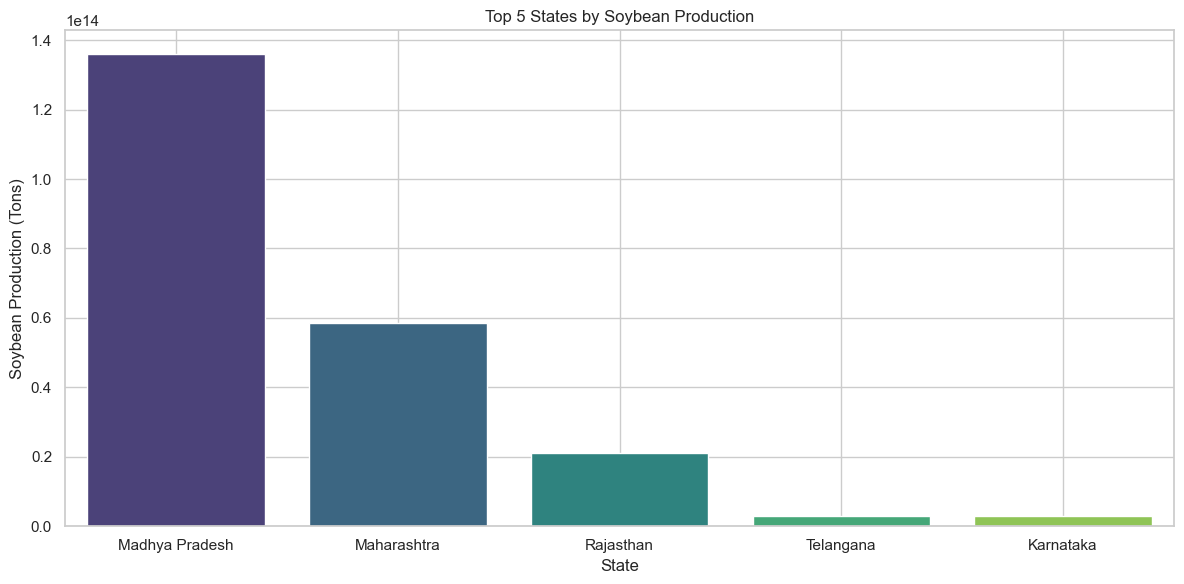

In [39]:
#Soybean Production by Top 5 States and Yield Efficiency
plt.figure(figsize=(12, 6))
top_soybean_states = df.groupby('State')['Soyabean_Production'].sum().nlargest(5).reset_index()
sns.barplot(x='State', y='Soyabean_Production', data=top_soybean_states, palette='viridis')
plt.xticks(rotation=360)
plt.grid(axis='x')
plt.title('Top 5 States by Soybean Production')
plt.xlabel('State')
plt.ylabel('Soybean Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Top_5_States_by_Soybean_Production.png")
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28624\3427447860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Oilseeds_Production', data=top_oilseed_states, palette='viridis')


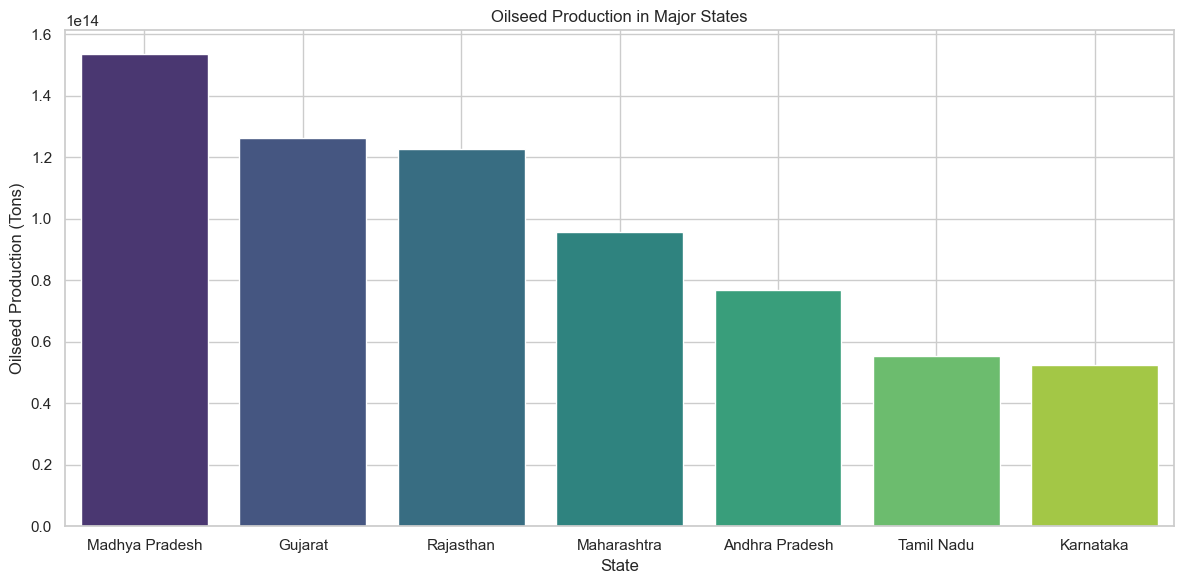

In [40]:
#Oilseed Production in Major States
plt.figure(figsize=(12, 6))
top_oilseed_states = df.groupby('State')['Oilseeds_Production'].sum().nlargest(7).reset_index()
sns.barplot(x='State', y='Oilseeds_Production', data=top_oilseed_states, palette='viridis')
plt.grid(axis='x')
plt.xticks(rotation=360)
plt.title('Oilseed Production in Major States')
plt.xlabel('State')
plt.ylabel('Oilseed Production (Tons)')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Oilseed_Production_in_Major_States.png")
plt.show()

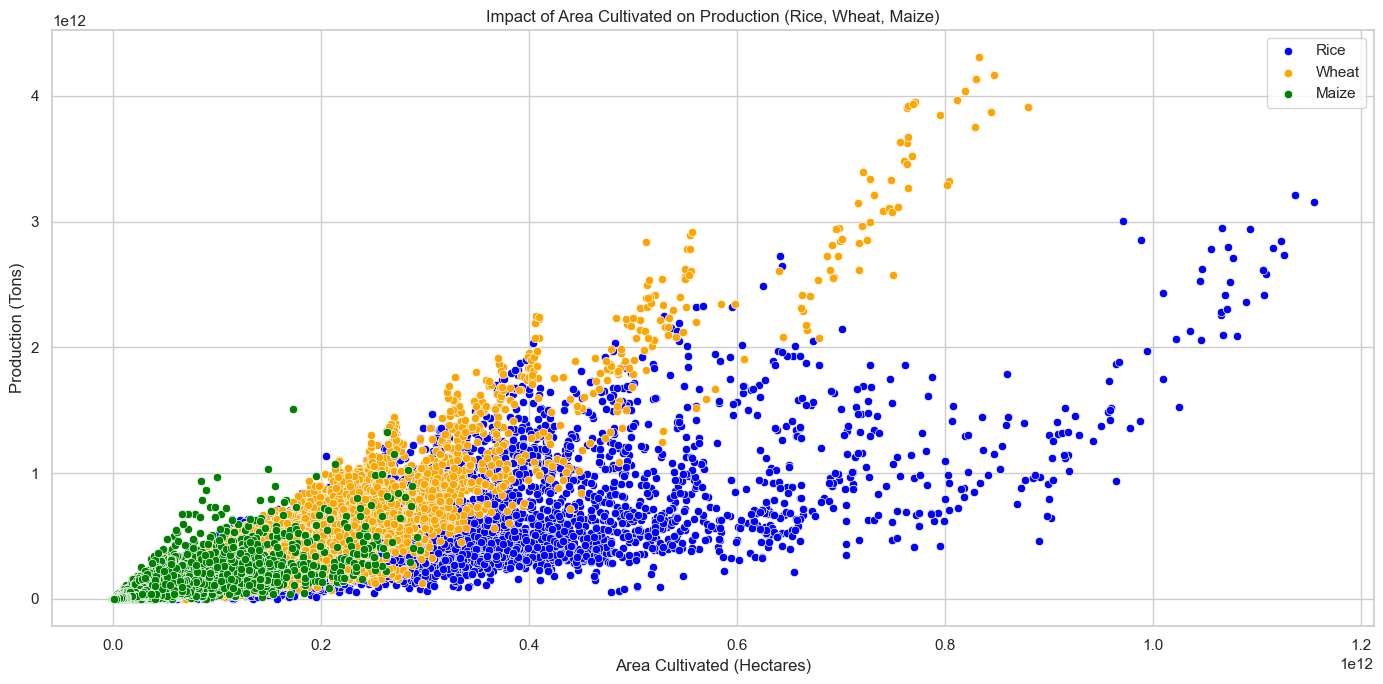

In [41]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Rice_Area', y='Rice_Production', label='Rice', color='blue')
sns.scatterplot(data=df, x='Wheat_Area', y='Wheat_Production', label='Wheat', color='orange')
sns.scatterplot(data=df, x='Maize_Area', y='Maize_Production', label='Maize', color='green')
plt.title('Impact of Area Cultivated on Production (Rice, Wheat, Maize)')
plt.xlabel('Area Cultivated (Hectares)')
plt.ylabel('Production (Tons)')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Impact_of_Area_Cultivated_on_Production.png")
plt.show()


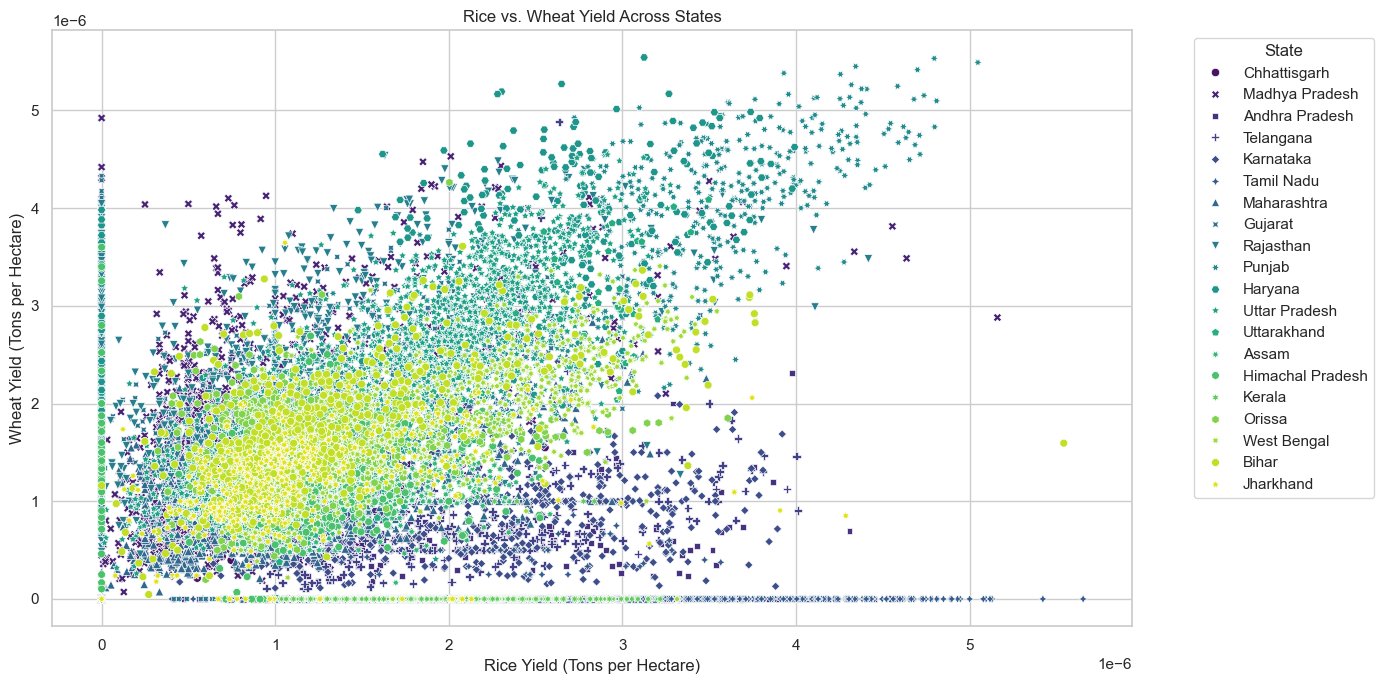

In [42]:
#Rice vs. Wheat Yield Across States
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Rice_Yield', y='Wheat_Yield', hue='State', style='State', palette='viridis')
plt.title('Rice vs. Wheat Yield Across States') 
plt.xlabel('Rice Yield (Tons per Hectare)')
plt.ylabel('Wheat Yield (Tons per Hectare)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r"C:\Users\LOQ\Downloads\Rice_vs_Wheat_Yield_Across_States.png")
plt.show()


In [77]:

import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [78]:
#connect to pgadmin
connection = psycopg2.connect(
    host = "localhost",
    user = "postgres",
    password = "moon123",
    port = 5432
)
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
mediator = connection.cursor()
mediator.execute("select version()")
version = mediator.fetchone()
print(f"the database version is: {version}")

the database version is: ('PostgreSQL 15.12, compiled by Visual C++ build 1943, 64-bit',)


In [79]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
#connect to pgadmin and create a database
connection = psycopg2.connect(
    host = "localhost",
    user = "postgres",
    password = "moon123",
    port = 5432
)
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
mediator = connection.cursor()
mediator.execute("CREATE DATABASE icrisat_db2")
# Connect to the newly created database
connection = psycopg2.connect(
    host = "localhost", 
    user = "postgres",
    password = "moon123",
    port = 5432,
    dbname = "icrisat_db2"
)
mediator = connection.cursor()
# Create a table to store the cleaned agricultural data
create_table_query = """CREATE TABLE IF NOT EXISTS dist_agri (
   id SERIAL PRIMARY KEY,
   District_Code VARCHAR(100), 
   Year INTEGER,
   State_Code VARCHAR(100),
    State VARCHAR(100),
    District VARCHAR(100),
    Rice_Area FLOAT,
    Rice_Production FLOAT,
    Rice_Yield FLOAT,
    Wheat_Area FLOAT,
    Wheat_Production FLOAT,
    Wheat_Yield FLOAT,
    Kharif_Sorghum_Area FLOAT,
    Kharif_Sorghum_Production FLOAT,
    Kharif_Sorghum_Yield FLOAT,
    Rabi_Sorghum_Area FLOAT,
    Rabi_Sorghum_Production FLOAT,
    Rabi_Sorghum_Yield FLOAT,
    Sorghum_Area FLOAT,
    Sorghum_Production FLOAT,
    Sorghum_Yield FLOAT,
    Pearl_Millet_Area FLOAT,
    Pearl_Millet_Production FLOAT,
    Pearl_Millet_Yield FLOAT,
    Maize_Area FLOAT,
    Maize_Production FLOAT,
    Maize_Yield FLOAT,
    Finger_Millet_Area FLOAT,
    Finger_Millet_Production FLOAT,
    Finger_Millet_Yield FLOAT,
    Barley_Area FLOAT,
    Barley_Production FLOAT,
    Barley_Yield FLOAT,
    Chickpea_Area FLOAT,
    Chickpea_Production FLOAT,
    Chickpea_Yield FLOAT,
    Pigeonpea_Area FLOAT,
    Pigeonpea_Production FLOAT,
    Pigeonpea_Yield FLOAT,
    Minor_Pulses_Area FLOAT,
    Minor_Pulses_Production FLOAT,
    Minor_Pulses_Yield FLOAT,
    Groundnut_Area FLOAT,
    Groundnut_Production FLOAT,
    Groundnut_Yield FLOAT,
    Sesamum_Area FLOAT,
    Sesamum_Production FLOAT,
    Sesamum_Yield FLOAT,
    Rapeseed_Mustard_Area FLOAT,
    Rapeseed_Mustard_Production FLOAT,
    Rapeseed_Mustard_Yield FLOAT,
    Safflower_Area FLOAT,
    Safflower_Production FLOAT,
    Safflower_Yield FLOAT,
    Castor_Area FLOAT,
    Castor_Production FLOAT,
    Castor_Yield FLOAT,
    Linseed_Area FLOAT,
    Linseed_Production FLOAT,
    Linseed_Yield FLOAT,
    Sunflower_Area FLOAT,
    Sunflower_Production FLOAT,
    Sunflower_Yield FLOAT,
    Soyabean_Area FLOAT,
    Soyabean_Production FLOAT,
    Soyabean_Yield FLOAT,
    Oilseeds_Area FLOAT,
    Oilseeds_Production FLOAT,
    Oilseeds_Yield FLOAT,
    Sugarcane_Area FLOAT,
    Sugarcane_Production FLOAT,
    Sugarcane_Yield FLOAT,
    Cotton_Area FLOAT,
    Cotton_Production FLOAT,
    Cotton_Yield FLOAT,
    Fruits_Area FLOAT,
    Vegetables_Area FLOAT,
    Fruits_Vegetables_Area FLOAT,
    Potatoes_Area FLOAT,
    Onion_Area FLOAT,
    Fodder_Area FLOAT
);"""
# Execute the create table query
mediator.execute(create_table_query)
# Commit the changes and close the connection
connection.commit()
mediator.close()
connection.close()
# 

In [81]:
# insert query
insert_query = """
INSERT INTO dist_agri (
    District_Code, Year, State_Code, State, District, Rice_Area, Rice_Production, Rice_Yield,
    Wheat_Area, Wheat_Production, Wheat_Yield, Kharif_Sorghum_Area,
    Kharif_Sorghum_Production, Kharif_Sorghum_Yield,
    Rabi_Sorghum_Area, Rabi_Sorghum_Production, Rabi_Sorghum_Yield,
    Sorghum_Area, Sorghum_Production, Sorghum_Yield,
    Pearl_Millet_Area, Pearl_Millet_Production, Pearl_Millet_Yield,
    Maize_Area, Maize_Production, Maize_Yield,
    Finger_Millet_Area, Finger_Millet_Production, Finger_Millet_Yield,
    Barley_Area, Barley_Production, Barley_Yield,
    Chickpea_Area, Chickpea_Production, Chickpea_Yield,
    Pigeonpea_Area, Pigeonpea_Production, Pigeonpea_Yield,
    Minor_Pulses_Area, Minor_Pulses_Production, Minor_Pulses_Yield,
    Groundnut_Area, Groundnut_Production, Groundnut_Yield,
    Sesamum_Area, Sesamum_Production, Sesamum_Yield,
    Rapeseed_Mustard_Area, Rapeseed_Mustard_Production, Rapeseed_Mustard_Yield,
    Safflower_Area, Safflower_Production, Safflower_Yield,
    Castor_Area, Castor_Production, Castor_Yield,
    Linseed_Area, Linseed_Production, Linseed_Yield,
    Sunflower_Area, Sunflower_Production, Sunflower_Yield,
    Soyabean_Area, Soyabean_Production, Soyabean_Yield,
    Oilseeds_Area, Oilseeds_Production, Oilseeds_Yield,
    Sugarcane_Area, Sugarcane_Production, Sugarcane_Yield,
    Cotton_Area, Cotton_Production, Cotton_Yield,
    Fruits_Area, Vegetables_Area, Fruits_Vegetables_Area,
    Potatoes_Area, Onion_Area, Fodder_Area
) 
VALUES (
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
)
"""

# Prepare data for insertion
data_to_insert = [
    (
      row['District_Code'], row['Year'], row['State_Code'], row['State'], row['District'],
      row['Rice_Area'], row['Rice_Production'], row['Rice_Yield'],
      row['Wheat_Area'], row['Wheat_Production'], row['Wheat_Yield'],
      row['Kharif_Sorghum_Area'], row['Kharif_Sorghum_Production'], row['Kharif_Sorghum_Yield'],
      row['Rabi_Sorghum_Area'], row['Rabi_Sorghum_Production'], row['Rabi_Sorghum_Yield'],
      row['Sorghum_Area'], row['Sorghum_Production'], row['Sorghum_Yield'],
      row['Pearl_Millet_Area'], row['Pearl_Millet_Production'], row['Pearl_Millet_Yield'],
      row['Maize_Area'], row['Maize_Production'], row['Maize_Yield'],
      row['Finger_Millet_Area'], row['Finger_Millet_Production'], row['Finger_Millet_Yield'],
      row['Barley_Area'], row['Barley_Production'], row['Barley_Yield'],
      row['Chickpea_Area'], row['Chickpea_Production'], row['Chickpea_Yield'],
      row['Pigeonpea_Area'], row['Pigeonpea_Production'], row['Pigeonpea_Yield'],
      row['Minor_Pulses_Area'], row['Minor_Pulses_Production'], row['Minor_Pulses_Yield'],
      row['Groundnut_Area'], row['Groundnut_Production'], row['Groundnut_Yield'],
      row['Sesamum_Area'], row['Sesamum_Production'], row['Sesamum_Yield'],
      row['Rapeseed_Mustard_Area'], row['Rapeseed_Mustard_Production'], row['Rapeseed_Mustard_Yield'],
      row['Safflower_Area'], row['Safflower_Production'], row['Safflower_Yield'],
      row['Castor_Area'], row['Castor_Production'], row['Castor_Yield'],
      row['Linseed_Area'], row['Linseed_Production'], row['Linseed_Yield'],
      row['Sunflower_Area'], row['Sunflower_Production'], row['Sunflower_Yield'],
      row['Soyabean_Area'], row['Soyabean_Production'], row['Soyabean_Yield'],
      row['Oilseeds_Area'], row['Oilseeds_Production'], row['Oilseeds_Yield'],
      row['Sugarcane_Area'], row['Sugarcane_Production'], row['Sugarcane_Yield'],
      row['Cotton_Area'], row['Cotton_Production'], row['Cotton_Yield'],
      row['Fruits_Area'], row['Vegetables_Area'], row['Fruits_Vegetables_Area'],
      row['Potatoes_Area'], row['Onion_Area'], row['Fodder_Area']
    )
    for _, row in df.iterrows()
]

#commit the changes to the database
connection = None
mediator = None
try:
    connection = psycopg2.connect(
        host="localhost",
        user="postgres",
        password="moon123",
        port=5432,
        dbname="icrisat_db2"
    )
    mediator = connection.cursor()
    # Insert data into the table
    mediator.executemany(insert_query, data_to_insert)  
    connection.commit()
    print("Data inserted successfully into agricultural_data table.")
except Exception as e:
    print("Error while inserting data:", e)
finally:
    if mediator is not None:
        mediator.close()
    if connection is not None:
        connection.close()
        print("PostgreSQL connection is closed.")

Data inserted successfully into agricultural_data table.
PostgreSQL connection is closed.
